In [ ]:
%pip install tensorflow-gpu

In [ ]:
import tensorflow as tf 
import os

In [ ]:
from tensorflow.keras import models,layers,datasets

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

In [ ]:
#No. of test and train images
print(len(train_images),len(test_images))

60000 10000


In [ ]:
#No. of axes and existing shape
print("No. of train axes",train_images.ndim)
print("No. of test axes",test_images.ndim)
print("Shape of train",train_images.shape)
print("Shape of test",test_images.shape)

No. of train axes 3
No. of test axes 3
Shape of train (60000, 28, 28)
Shape of test (10000, 28, 28)


In [ ]:
#Lets reshape
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#No. of axes and reshaped shape
print("No. of train axes",train_images.ndim)
print("No. of test axes",test_images.ndim)
print("Shape of train",train_images.shape)
print("Shape of test",test_images.shape)

No. of train axes 4
No. of test axes 4
Shape of train (60000, 28, 28, 1)
Shape of test (10000, 28, 28, 1)


In [ ]:
#Building a sequential model
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


# NOW WE ADD DENSE LAYERS ON THE TOP

Here we convert the 3D model to 1D to predict the labels

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=30)

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.9925


In [ ]:
print("test loss:",test_loss,", test accuracy:",test_acc)

test loss: 0.0443277545273304 , test accuracy: 0.9925000071525574


In [ ]:
import matplotlib.pyplot as plt

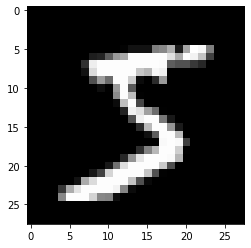

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

image=train_images[0]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
  # convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img


In [ ]:
img1 = load_image('000000-num7.png')
img2 = load_image('000007-num9.png')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
print("Axis:",img1.ndim)
print("Dimensions:",img1.shape)

Axis: 4
Dimensions: (1, 28, 28, 1)


In [ ]:
import numpy as np

result1=model.predict_classes(img1)
result2=model.predict_classes(img2)

print(result1)
print(result2)

[7]
[9]
